<a href="https://colab.research.google.com/github/flaviabiaty/analise_cancelamento/blob/main/analiseAtendimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise para identificar problemas no Atendimento ao Cliente

**Informações sobre os campos da base**
 Campo               | Tipo  | Descrição                         | Obs                               |
| ------------------- | ----- | --------------------------------- | --------------------------------- |
| ID_Cliente          | int   | Código Cliente                    | Não deve repetir                  |
| Tempo_Espera        | int   | Tempo que o cliente aguardou      | Quanto maior, pior a experiência? |
| Tempo_Resolucao     | int   | Tempo para Resolução do problema  | Quanto maior, pior a experiência? |
| Satisfacao_Cliente  | int   | Nota para o atendimento           | (escala 0–10)                     |
| Canal_Atendimento   | texto | Canal utilizado                   | Comparação de desempenho          |
| Tipo_Problema       | texto | Categoria do problema             | Comparação de causas              |
| Feedback_Sentimento | texto | Sentimento de feedback do cliente | Análise de sentimento             |
| Media_NPS           | int   | Nível de recomendação             | Indicador de lealdade             |
| Qtd_Reclamacoes           | int   | Quantidade de Reclamações   | Indicador de permanência de problemas   |
| Problema_Solucionado           | texto   | Resolução             | Variável Binária             |


###Importação e validação de inconsistências da base

*   Importação de arquivo .csv
*   Verificação de campos nulos
*   Verificação de duplicidade em chaves únicas
*   Validação geral de dados



In [134]:
#importacao da base de dados
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/flaviabiaty/analise_customer_experience/refs/heads/main/base_atendimento.csv", sep=";")
df.head()

,ID_Cliente,Tempo_Espera,Tempo_Resolucao,Satisfacao_Cliente,Canal_Atendimento,Tipo_Problema,Feedback_Sentimento,Media_NPS,Qtd_Reclamacoes,Problema_Solucionado
0,1,11,22,6,E-mail,Cobrança,Positivo,61,1,Sim
1,2,5,10,9,E-mail,Atendimento Ruim,Neutro,88,0,Não
2,3,21,41,3,Chat,Produto Defeituoso,Neutro,28,2,Sim
3,4,13,27,6,Redes Sociais,Produto Defeituoso,Negativo,55,1,Sim
4,5,16,34,4,Redes Sociais,Produto Defeituoso,Negativo,37,2,Não


In [86]:
#tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID_Cliente            1000 non-null   int64 
 1   Tempo_Espera          1000 non-null   int64 
 2   Tempo_Resolucao       1000 non-null   int64 
 3   Satisfacao_Cliente    1000 non-null   int64 
 4   Canal_Atendimento     1000 non-null   object
 5   Tipo_Problema         1000 non-null   object
 6   Feedback_Sentimento   1000 non-null   object
 7   Media_NPS             1000 non-null   int64 
 8   Qtd_Reclamacoes       1000 non-null   int64 
 9   Problema_Solucionado  1000 non-null   object
dtypes: int64(6), object(4)
memory usage: 78.3+ KB


In [87]:
#verifica campos vazios
df.isnull().sum()

,0
ID_Cliente,0
Tempo_Espera,0
Tempo_Resolucao,0
Satisfacao_Cliente,0
Canal_Atendimento,0
Tipo_Problema,0
Feedback_Sentimento,0
Media_NPS,0
Qtd_Reclamacoes,0
Problema_Solucionado,0


In [88]:
#somente se necessário:
#remoção das linhas com informações em branco
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID_Cliente            1000 non-null   int64 
 1   Tempo_Espera          1000 non-null   int64 
 2   Tempo_Resolucao       1000 non-null   int64 
 3   Satisfacao_Cliente    1000 non-null   int64 
 4   Canal_Atendimento     1000 non-null   object
 5   Tipo_Problema         1000 non-null   object
 6   Feedback_Sentimento   1000 non-null   object
 7   Media_NPS             1000 non-null   int64 
 8   Qtd_Reclamacoes       1000 non-null   int64 
 9   Problema_Solucionado  1000 non-null   object
dtypes: int64(6), object(4)
memory usage: 78.3+ KB


In [89]:
#verifica duplicatas
df["ID_Cliente"].duplicated().sum()

np.int64(0)

In [90]:
df["Canal_Atendimento"].unique()


array(['E-mail', 'Chat', 'Redes Sociais', 'Telefone', 'WhatsApp'],
      dtype=object)

In [91]:
df["Tipo_Problema"].unique()


array(['Cobrança', 'Atendimento Ruim', 'Produto Defeituoso', 'Dúvida'],
      dtype=object)

In [92]:
df["Feedback_Sentimento"].unique()


array(['Positivo', 'Neutro', 'Negativo'], dtype=object)

In [93]:
df["Problema_Solucionado"].unique()

array(['Sim', 'Não'], dtype=object)

In [94]:
#estatísticas descritivas
df.describe()

,ID_Cliente,Tempo_Espera,Tempo_Resolucao,Satisfacao_Cliente,Media_NPS,Qtd_Reclamacoes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,13.356000,27.669000,5.572000,55.016000,1.381000
std,288.819436,8.781137,17.102747,2.978538,29.698076,1.133633
min,1.000000,1.000000,5.000000,1.000000,0.000000,0.000000
25%,250.750000,5.000000,11.000000,3.000000,28.000000,0.000000
50%,500.500000,13.000000,26.000000,6.000000,56.000000,1.000000
75%,750.250000,21.000000,43.000000,8.000000,82.000000,2.000000
max,1000.000000,30.000000,60.000000,10.000000,100.000000,3.000000


### Perguntas de Negócio

**Variáveis de Interesse**

*   Satisfação do Cliente
*   NPS
*   Resolução do Problema



*   O  tempo de atendimento tem um impacto significativo na satisfação do cliente?
*   Existe uma relação clara entre tempo de atendimento e Net Promoter Score (NPS)?

*   Quais fatores afetam diretamente o NPS?
*   Será que há relação entre tempo de atendimento, quantidade de reclamações, tempo de resolução e NPS?

**Conclusões pós análise**
*  Quanto maior o tempo de espera, menor o NPS e menor a satisfação do cliente
*  Tempo de espera e tempo de resolução apresentam forte associação negativa com o NPS e a satisfação do cliente.
* Feedback de Sentimento não permite discriminar a experiência do cliente

**Com base nas análises realizadas, para melhorar a experiência do cliente e aumentar a satisfação, reduções no *tempo de espera* e no *tempo de resolução* apresentam alto potencial de impacto positivo na experiência do cliente.**

###Análise dos Dados

In [95]:
import matplotlib.pyplot as plt

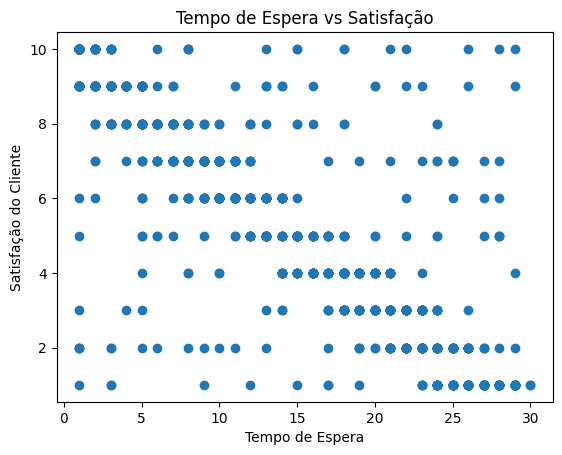

In [96]:
plt.figure()
plt.scatter(df["Tempo_Espera"], df["Satisfacao_Cliente"])
plt.xlabel("Tempo de Espera")
plt.ylabel("Satisfação do Cliente")
plt.title("Tempo de Espera vs Satisfação")
plt.show()

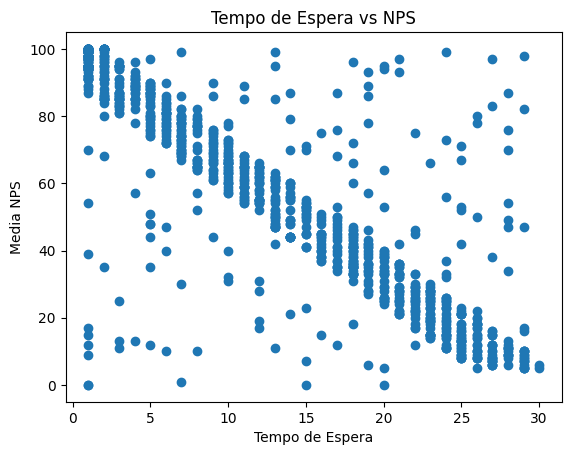

In [ ]:
plt.figure()
plt.scatter(df["Tempo_Espera"], df["Media_NPS"])
plt.xlabel("Tempo de Espera")
plt.ylabel("Media NPS")
plt.title("Tempo de Espera vs NPS")
plt.show()

In [ ]:
corr_satisfacao = df["Tempo_Espera"].corr(df["Satisfacao_Cliente"])
corr_nps = df["Tempo_Espera"].corr(df["Media_NPS"])

print("Correlação entre Tempo_Espera e Satisfacao_Cliente:", round(corr_satisfacao, 3))
print("Correlação entre Tempo_Espera e Media_NPS:", round(corr_nps, 3))

Correlação entre Tempo_Espera e Satisfacao_Cliente: -0.834
Correlação entre Tempo_Espera e Media_NPS: -0.832




> **Em ambos os casos, há uma correlação negativa, quanto maior o tempo de espera, menor o NPS e menor a satisfação do cliente**



In [ ]:
cols = ["Media_NPS","Tempo_Espera", "Qtd_Reclamacoes",
        "Tempo_Resolucao"]
correlacoes = df[cols].corr()
display(correlacoes)

,Media_NPS,Tempo_Espera,Qtd_Reclamacoes,Tempo_Resolucao
Media_NPS,1.000000,-0.832374,-0.837096,-0.855738
Tempo_Espera,-0.832374,1.000000,0.798960,0.847535
Qtd_Reclamacoes,-0.837096,0.798960,1.000000,0.840634
Tempo_Resolucao,-0.855738,0.847535,0.840634,1.000000


> **Há uma correlação negativa com todas as variáveis**


1.   Quanto maior o tempo de espera, mais reclamações
2.   Quanto maior o tempo de espera, maior o tempo de resolução
3.   Quanto maior o tempo de resolução, maior a quantidade de reclamações
4.   Quanto maior as três variáveis, menor a média de NPS
5.   O tempo de resolução tem a maior correlação com todas as variáveis


  

In [97]:
matriz = pd.crosstab(df['Feedback_Sentimento'],
                     df['Problema_Solucionado'])

print(matriz)

Problema_Solucionado  Não  Sim
Feedback_Sentimento           
Negativo              165  159
Neutro                162  174
Positivo              180  160


In [101]:
import numpy as np
# garantir binário 0/1
df['Problema_Solucionado_bin'] = df['Problema_Solucionado'].map({'Sim':1, 'Não':0})

# Tabela agregada
tabela = df.groupby('Feedback_Sentimento')['Problema_Solucionado_bin'].agg(['count','sum'])
tabela.columns = ['Total', 'Eventos(S)']
tabela['Nao_Eventos'] = tabela['Total'] - tabela['Eventos(S)']

# Totais globais
total_eventos = tabela['Eventos(S)'].sum()
total_nao_eventos = tabela['Nao_Eventos'].sum()

# Distribuições
tabela['Dist_Eventos'] = tabela['Eventos(S)'] / total_eventos
tabela['Dist_Nao_Eventos'] = tabela['Nao_Eventos'] / total_nao_eventos

# Odds
tabela['Odds'] = (tabela['Dist_Eventos'] / tabela['Dist_Nao_Eventos'])

# IV por categoria
tabela['IV'] = (tabela['Dist_Eventos'] - tabela['Dist_Nao_Eventos']) * np.log(tabela['Odds'])

IV_total = tabela['IV'].sum()


display(tabela)
print("Information Value:", IV_total)

,Total,Eventos(S),Nao_Eventos,Dist_Eventos,Dist_Nao_Eventos,Odds,IV
Feedback_Sentimento,,,,,,,
Negativo,324,159,165,0.322515,0.325444,0.991001,0.000026
Neutro,336,174,162,0.352941,0.319527,1.104575,0.003323
Positivo,340,160,180,0.324544,0.355030,0.914131,0.002737


Information Value: 0.0060869778866679165




> **O poder de separação entre o Sentimento e a Solução dos Problemas é fraco, portanto outras variáveis devem ser analisadas**



In [111]:
#CATEGORIZAÇÃO DA VARIAVEL TEMPO_ESPERA PARA FAZER O INFORMATION VALUE
# Descobrir o valor máximo
max_tempo = df['Tempo_Espera'].max()

# Criar limites de 5 em 5 até passar do máximo (para fazer a categorização)
bins = np.arange(0, max_tempo + 5, 5)

# Criar categorização via pd.cut
df['Tempo_Espera_Cat'] = pd.cut(
    df['Tempo_Espera'],
    bins=bins, #limite do intervalo
    right=True, #intervalo fechado à direita
    include_lowest=True #O primeiro intervalo inclui o valor mínimo da base
)

print(df['Tempo_Espera_Cat'].value_counts().sort_index())
labels = [f'{int(bins[i]+1)}-{int(bins[i+1])}' for i in range(len(bins)-1)]

df['Tempo_Espera_Cat'] = pd.cut(
    df['Tempo_Espera'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

Tempo_Espera_Cat
(-0.001, 5.0]    260
(5.0, 10.0]      164
(10.0, 15.0]     152
(15.0, 20.0]     155
(20.0, 25.0]     172
(25.0, 30.0]      97
Name: count, dtype: int64


In [115]:
# Tabela agregada
tabela = df.groupby('Tempo_Espera_Cat')['Problema_Solucionado_bin'].agg(['count','sum'])
tabela.columns = ['Total', 'Eventos(S)']
tabela['Nao_Eventos'] = tabela['Total'] - tabela['Eventos(S)']

# Totais globais
total_eventos = tabela['Eventos(S)'].sum()
total_nao_eventos = tabela['Nao_Eventos'].sum()

# Distribuições
tabela['Dist_Eventos'] = tabela['Eventos(S)'] / total_eventos
tabela['Dist_Nao_Eventos'] = tabela['Nao_Eventos'] / total_nao_eventos

# Odds
tabela['Odds'] = (tabela['Dist_Eventos'] / tabela['Dist_Nao_Eventos'])

# IV por categoria
tabela['IV'] = (tabela['Dist_Eventos'] - tabela['Dist_Nao_Eventos']) * np.log(tabela['Odds'])

IV_total = tabela['IV'].sum()


display(tabela)
print("Information Value:", IV_total)

/tmp/ipython-input-2829156416.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela = df.groupby('Tempo_Espera_Cat')['Problema_Solucionado_bin'].agg(['count','sum'])


,Total,Eventos(S),Nao_Eventos,Dist_Eventos,Dist_Nao_Eventos,Odds,IV
Tempo_Espera_Cat,,,,,,,
1-5,260,182,78,0.369168,0.153846,2.399594,0.188471
6-10,164,103,61,0.208925,0.120316,1.736475,0.048900
11-15,152,70,82,0.141988,0.161736,0.877900,0.002572
16-20,155,41,114,0.083164,0.224852,0.369862,0.140926
21-25,172,66,106,0.133874,0.209073,0.640323,0.033522
26-30,97,31,66,0.062880,0.130178,0.483035,0.048970


Information Value: 0.463361040610844




> Há um poder de separação forte entre as variáveis: categorias com menor tempo apresentam maior concentração de eventos, **sugerindo que menor tempo de espera está associado a maior probabilidade de resolução**.




In [116]:
import statsmodels.api as sm

X = df[['Tempo_Espera']]
y = df['Problema_Solucionado_bin']

X = sm.add_constant(X)

modelo = sm.Logit(y, X).fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.646437
         Iterations 5
                              Logit Regression Results                              
Dep. Variable:     Problema_Solucionado_bin   No. Observations:                 1000
Model:                                Logit   Df Residuals:                      998
Method:                                 MLE   Df Model:                            1
Date:                      Thu, 12 Feb 2026   Pseudo R-squ.:                 0.06726
Time:                              19:14:48   Log-Likelihood:                -646.44
converged:                             True   LL-Null:                       -693.05
Covariance Type:                  nonrobust   LLR p-value:                 4.671e-22
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9360      0.123      7.623      0.000


β<0 (-0.0726) ⇒aumentar a **variavel** reduz a probabilidade do evento
> **Quanto maior o tempo de espera, menor a probabilidade do problema ser resolvido.**



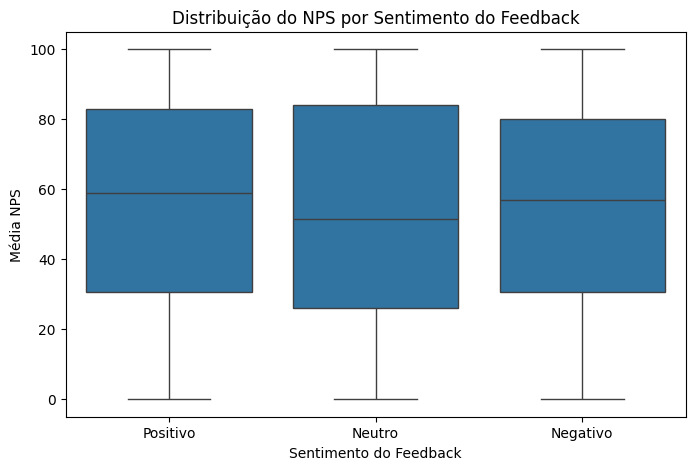

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

sns.boxplot(
    x='Feedback_Sentimento',
    y='Media_NPS',
    data=df
)

plt.title('Distribuição do NPS por Sentimento do Feedback')
plt.xlabel('Sentimento do Feedback')
plt.ylabel('Média NPS')

plt.show()

A distribuição de notas NPS é similar entre os sentimentos

In [133]:
# Tabela agregada
tabela = df.groupby('Feedback_Sentimento')['Media_NPS'].agg(['count',lambda x: x.var(ddof=0)])
tabela.columns = ['Total','Variancia.p']
tabela['Var_Ponderada'] = tabela['Total'] * tabela['Variancia.p']

display(tabela)
varPonderada_total = (tabela['Var_Ponderada'].sum())/(tabela['Total'].sum())
print('Variância Ponderada:', varPonderada_total)
variancia_populacional = df['Media_NPS'].var(ddof=0)
print('Comparação com a Variancia Original:', 1-(varPonderada_total/variancia_populacional))


,Total,Variancia.p,Var_Ponderada
Feedback_Sentimento,,,
Negativo,324,841.382716,272608.000000
Neutro,336,938.612209,315373.702381
Positivo,340,859.984256,292394.647059


Variância Ponderada: 880.3763494397767
Comparação com a Variancia Original: 0.0008142091180532995


Feedback_Sentimento provavelmente não está associado fortemente ao NPS.